# Fase de entrenamiento


*   Importamos el dataset limpio
*   Dividimos nuestros datos 80% para entrenamiento, 20% para evaluar
*   Generamos nuestro modelo y evaluamos

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

#Importamos nuestra base de datos limpia
df = pd.read_csv("/content/Dataset_ML_Limpio_V1.csv")

#Utilizamos el metodo (df.head) para que se desplieguen los primeros 5 datos de nuestro archivo
df.head()

,year,selling_price,transmission,potencia_motor_hp,nivel_seguridad,score_calidad,eficiencia_km_l,calidad_auto_num
0,2007,60000,0,244,1.2,5.0,9.450009,1
1,2007,135000,0,376,2.1,6.6,9.450009,1
2,2012,600000,0,199,2.2,6.3,10.259988,1
3,2017,250000,0,302,2.4,6.7,11.610005,1
4,2014,450000,0,108,1.9,6.0,10.799963,1


In [10]:
#Quitamos la columna que queremos predecir
X = df.drop(columns=["calidad_auto_num"])
y = df["calidad_auto_num"]

#Realizamos un split de datos con nuestra libreria de skLearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Generamos nuestro modelo con los parametros determinados (Usando como metrica de evaluacion "LogLoss")
modelo = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
modelo.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

#Realizamos prediciones con nuestro modelo ya creado y lo evaluamos con su "Test Dataset"
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Baja", "Media", "Alta"]))

[0]	validation_0-mlogloss:0.70252	validation_1-mlogloss:0.70252
[1]	validation_0-mlogloss:0.47998	validation_1-mlogloss:0.47999
[2]	validation_0-mlogloss:0.33775	validation_1-mlogloss:0.33776
[3]	validation_0-mlogloss:0.24169	validation_1-mlogloss:0.24170
[4]	validation_0-mlogloss:0.17480	validation_1-mlogloss:0.17481
[5]	validation_0-mlogloss:0.12733	validation_1-mlogloss:0.12734
[6]	validation_0-mlogloss:0.09321	validation_1-mlogloss:0.09322
[7]	validation_0-mlogloss:0.06849	validation_1-mlogloss:0.06849
[8]	validation_0-mlogloss:0.05045	validation_1-mlogloss:0.05046
[9]	validation_0-mlogloss:0.03725	validation_1-mlogloss:0.03725
[10]	validation_0-mlogloss:0.02754	validation_1-mlogloss:0.02755
[11]	validation_0-mlogloss:0.02040	validation_1-mlogloss:0.02041
[12]	validation_0-mlogloss:0.01513	validation_1-mlogloss:0.01514
[13]	validation_0-mlogloss:0.01124	validation_1-mlogloss:0.01125
[14]	validation_0-mlogloss:0.00837	validation_1-mlogloss:0.00837
[15]	validation_0-mlogloss:0.00624	

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:16:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[28]	validation_0-mlogloss:0.00029	validation_1-mlogloss:0.00029
[29]	validation_0-mlogloss:0.00026	validation_1-mlogloss:0.00026
[30]	validation_0-mlogloss:0.00024	validation_1-mlogloss:0.00024
[31]	validation_0-mlogloss:0.00022	validation_1-mlogloss:0.00022
[32]	validation_0-mlogloss:0.00021	validation_1-mlogloss:0.00022
[33]	validation_0-mlogloss:0.00021	validation_1-mlogloss:0.00021
[34]	validation_0-mlogloss:0.00020	validation_1-mlogloss:0.00021
[35]	validation_0-mlogloss:0.00020	validation_1-mlogloss:0.00020
[36]	validation_0-mlogloss:0.00020	validation_1-mlogloss:0.00020
[37]	validation_0-mlogloss:0.00020	validation_1-mlogloss:0.00020
[38]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00020
[39]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00020
[40]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00020
[41]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00019
[42]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00019
[43]	validation_0-mloglos

# **Fase de Pruebas**

En esta seccion lo que hicimos fue dividir de forma equitativa los datos de prueba y acortar su tamaño, de esta forma nos podemos asegurar que la precision anteriormente mencionada no solamente se genera por que siempre la gran mayoria de resultados es "Medio".

Para hacer esto realizamos el siguiente proceso:

- Tomamos el database de "X_Test" y "Y_Test" para separarlos especificamente en sus distintas secciones "Baja", "Media", "Alta"

- Tomamos cada una de las secciones y tomamos 110 valores random

- Juntamos el modelo con este nuevo "X_Test_Balanceado" y evaluamos para sacar sus resultados

In [3]:
#Juntar los valores de test tanto de x como y en un Datafram
df_Prueba = pd.concat([X_test, y_test], axis=1)


#Dividir en dataframes distintos, categorizandolos por lo que son
baja = df_Prueba[df_Prueba["calidad_auto_num"] == 0]
media = df_Prueba[df_Prueba["calidad_auto_num"] == 1]
alta = df_Prueba[df_Prueba["calidad_auto_num"] == 2]

#Seleccionar el mismo numero de valores para test, por clasificacion
#De esta forma podemos evitar que nuestro grupo de Test_Data, tenga valores repetitivos
n = 110
baja_sample = baja.sample(n, random_state=42)
media_sample = media.sample(n, random_state=42)
alta_sample = alta.sample(n, random_state=42)

#Luego los combinamos nuevamente
df_balanceado = pd.concat([baja_sample, media_sample, alta_sample])

#Los separamos por variables y objetivo para poder utilizar en nuestro modelo
X_test_balanceado = df_balanceado.drop(columns=["calidad_auto_num"])
y_test_balanceado = df_balanceado["calidad_auto_num"]

#Predecimos y Evaluamos
y_pred = modelo.predict(X_test_balanceado)

print(classification_report(y_test_balanceado, y_pred, target_names=["Baja", "Media", "Alta"]))


              precision    recall  f1-score   support

        Baja       1.00      1.00      1.00       110
       Media       1.00      1.00      1.00       110
        Alta       1.00      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



En la siguiente seccion se realizo un analisis mas que nada visual del modelo en el que gracias a la libreria de "MatplotLib" fue que generamos una grafica que nos iba demostrando cual era el resulado de la metrica de evaluacion de nuestro modelo (siendo "mlogloss") atravez de las iteraciones del arbol de decisiones.

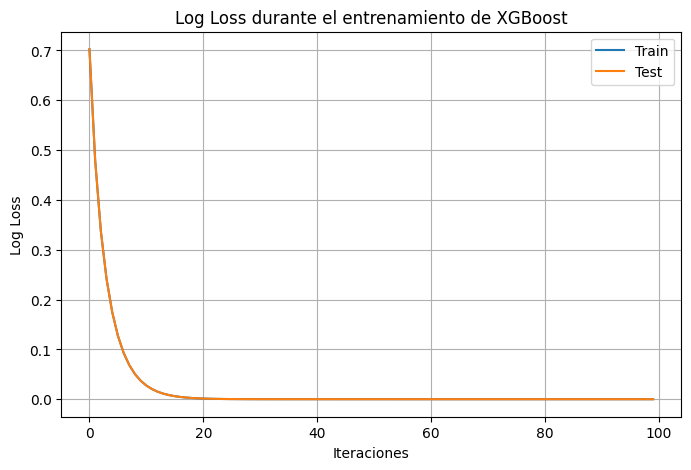

In [4]:
#Este valor lo obtenemos de nuestro evalset, guardando literalmente los resultados de cada evaluacion
eval_result = modelo.evals_result()

#Al tener como metrica de evaluacion a LogLoss la aprovechamos para graficar
epochs = len(eval_result['validation_0']['mlogloss'])
x_axis = range(epochs)

plt.figure(figsize=(8, 5))
plt.plot(x_axis, eval_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, eval_result['validation_1']['mlogloss'], label='Test')
plt.xlabel("Iteraciones"); plt.ylabel("Log Loss")
plt.title("Log Loss durante el entrenamiento de XGBoost")
plt.legend(); plt.grid(True)
plt.show()


Seccion de codigo que nos permite descargar el modelo para aplicarlo posteriormente

In [5]:
import joblib

#Para Descargar el modelo
joblib.dump(modelo, "modelo_xgboost.pkl")

['modelo_xgboost.pkl']

A continuación, se generará una matriz de confusión para visualizar el rendimiento del modelo en los datos de prueba balanceados.

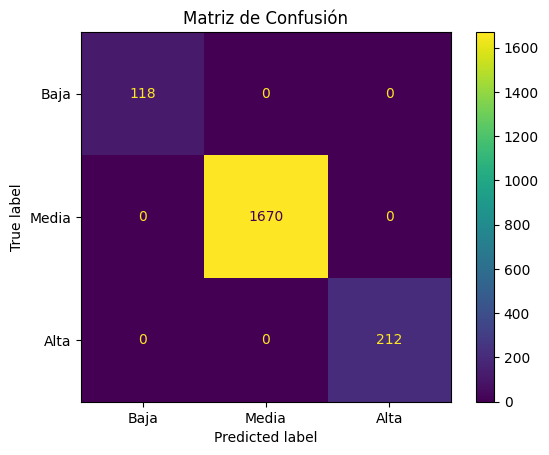

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Media", "Alta"])
disp.plot()
plt.title("Matriz de Confusión")
plt.show()